In [2]:
import spotipy
import pandas as pd
import json
import config
from sklearn.datasets import make_blobs
from spotipy.oauth2 import SpotifyClientCredentials

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans



In [3]:
FinalDf = pd.read_csv('FinalDf.csv')
FinalDf

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.936,0.887,-2.760,0.0683,0.02920,0.000002,0.0582,0.8890,127.003,2HYFX63wP3otVIvopRS99Z,227239,Houdini
1,0.908,0.669,-2.827,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,7lQ8MOhq6IN2w8EYcFNSUk,290320,Without Me
2,0.637,0.678,-3.798,0.2660,0.20900,0.000000,0.1560,0.2540,84.039,561jH07mF1jHuk7KlaeF0s,250760,Mockingbird
3,0.548,0.847,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,4xkOaSrkexMciUUogZKVTS,297787,Till I Collapse
4,0.949,0.661,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,3yfqSUWxFvZELEM4PmlwIR,284200,The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,1Wl0fMRT0YzndDmHZCFvoT,131294,Roadtrip
1340,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,6DGIg7YNSXWz1SAnJ1S8bX,278719,Paradise
1341,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,6WzGciwEdqlkPuMf3bDmX7,157192,Roadtrip
1342,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,2IJZWPp6TnMWHyGqjrz3Ci,375361,Roadtrip - Moritz Hofbauer Remix


In [5]:
#Final DF without name and id - df_final

columns_to_drop = ["id","names"]
df_final = FinalDf.drop(columns = columns_to_drop)
df_final

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.936,0.887,-2.760,0.0683,0.02920,0.000002,0.0582,0.8890,127.003,227239
1,0.908,0.669,-2.827,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,290320
2,0.637,0.678,-3.798,0.2660,0.20900,0.000000,0.1560,0.2540,84.039,250760
3,0.548,0.847,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787
4,0.949,0.661,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200
...,...,...,...,...,...,...,...,...,...,...
1339,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294
1340,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719
1341,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192
1342,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361


In [8]:
#Df with names - names_id

names_id = FinalDf[columns_to_drop]
names_id

,id,names
0,2HYFX63wP3otVIvopRS99Z,Houdini
1,7lQ8MOhq6IN2w8EYcFNSUk,Without Me
2,561jH07mF1jHuk7KlaeF0s,Mockingbird
3,4xkOaSrkexMciUUogZKVTS,Till I Collapse
4,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady
...,...,...
1339,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
1340,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
1341,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
1342,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


## Starting with Spotify API

In [11]:
import config

import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id, 
                                                           client_secret= config.client_secret))

In [13]:
results = sp.search(q="roadtrip", limit = 50, market="DE")#, offset = 51)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=roadtrip&type=track&market=DE&offset=0&limit=50',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5'},
       'href': 'https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5',
       'id': '0L8ExT028jH3ddEcZwqJJ5',
       'name': 'Red Hot Chili Peppers',
       'type': 'artist',
       'uri': 'spotify:artist:0L8ExT028jH3ddEcZwqJJ5'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/2Y9IRtehByVkegoD7TcLfi'},
     'href': 'https://api.spotify.com/v1/albums/2Y9IRtehByVkegoD7TcLfi',
     'id': '2Y9IRtehByVkegoD7TcLfi',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b27394d08ab63e57b0cae74e8595',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e0294d08ab63e57b0cae74e8595',
       'width': 300},
      {'height': 64,
       'url': '

In [14]:
import pprint
pprint.pprint(results)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=roadtrip&type=track&market=DE&offset=0&limit=50',
            'items': [{'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5'},
                                              'href': 'https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5',
                                              'id': '0L8ExT028jH3ddEcZwqJJ5',
                                              'name': 'Red Hot Chili Peppers',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:0L8ExT028jH3ddEcZwqJJ5'}],
                                 'external_urls': {'spotify': 'https://open.spotify.com/album/2Y9IRtehByVkegoD7TcLfi'},
                                 'href': 'https://api.spotify.com/v1/albums/2Y9IRtehByVkegoD7TcLfi',
                                 'id': '2Y9IRt

# Understanding the json

In [18]:
print("The json file has the following keys: ",list(results.keys()))
print("The 'tracks' key has the following child keys: ",list(results["tracks"].keys())) # Let's check the values
print("The query we made is: ",results["tracks"]["href"]) # Query we have searched 
print("The song's info is contained in: ",results["tracks"]["items"]) #items (actual tracks)

The json file has the following keys:  ['tracks']
The 'tracks' key has the following child keys:  ['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
The query we made is:  https://api.spotify.com/v1/search?query=roadtrip&type=track&market=DE&offset=0&limit=50
The song's info is contained in:  [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5'}, 'href': 'https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5', 'id': '0L8ExT028jH3ddEcZwqJJ5', 'name': 'Red Hot Chili Peppers', 'type': 'artist', 'uri': 'spotify:artist:0L8ExT028jH3ddEcZwqJJ5'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/2Y9IRtehByVkegoD7TcLfi'}, 'href': 'https://api.spotify.com/v1/albums/2Y9IRtehByVkegoD7TcLfi', 'id': '2Y9IRtehByVkegoD7TcLfi', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b27394d08ab63e57b0cae74e8595', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/a

## Other Info

In [21]:
results["tracks"]["items"][0]["artists"] # Track artists
results["tracks"]["items"][0]["id"] # Track ID
results["tracks"]["items"][0]["name"] # Track name
results["tracks"]["items"][0]["popularity"] 
results["tracks"]["items"][0]["uri"]

'spotify:track:1XxCiPw07rd1ytYnE7SoJI'

## Getting the track_id

In [24]:
track_id=results["tracks"]["items"][0]["id"]
track_id

'1XxCiPw07rd1ytYnE7SoJI'

In [26]:
for item in results ["tracks"]["items"]:
    print("The name of song is: '{}' and the id is: {}".format(item['name'],item["id"]))

The name of song is: 'Road Trippin'' and the id is: 1XxCiPw07rd1ytYnE7SoJI
The name of song is: 'Roadtrip' and the id is: 6HB11gTmbJOX6H63K8Bu74
The name of song is: 'Road Trippin'' and the id is: 7Gpr3kKk4BMgItz6UbI73q
The name of song is: 'Roadtrip' and the id is: 4Agtk2MrapdZAVN7v6PuFO
The name of song is: 'Roadtrip' and the id is: 47ZtIbXcqQt0z3YFmcscDI
The name of song is: 'ROADTRiP' and the id is: 0V0MNhSdFg9sjW8RLxeGro
The name of song is: 'roadtrip' and the id is: 1eR2lNmKEnNxPsLDfSp6XF
The name of song is: 'Roadtrip Home' and the id is: 1D3SWUVJqnQfRtOpAmLdTx
The name of song is: 'Dancing in the Moonlight' and the id is: 1FHNctV68GUNLgXclG2DtR
The name of song is: 'ROADTRIP' and the id is: 3Jheaco1IVTjisxZOARLXK
The name of song is: 'Iris' and the id is: 6vZ0SkAw8X46gpY6masmsH
The name of song is: 'Roadtrip' and the id is: 2QLUYiNzHJuIfB6M0PUbrJ
The name of song is: 'roadtrip' and the id is: 0V54RaK7KhF3vzydplIOyk
The name of song is: 'Road Trip' and the id is: 1dYQGKg95iWiHs5

## Embedded track player

In [29]:
from IPython.display import IFrame


In [31]:
from IPython.display import IFrame

track_id = '0KLgbvtnNbfvwy9x4HxlEV'
#track_id= 'spotify:track:1eT2CjXwFXNx6oY5ydvzKU'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [33]:
id = results["tracks"]["items"][0]["id"]
id

'1XxCiPw07rd1ytYnE7SoJI'

In [35]:
sp.audio_features(id)

[{'danceability': 0.243,
  'energy': 0.47,
  'key': 4,
  'loudness': -8.194,
  'mode': 0,
  'speechiness': 0.0353,
  'acousticness': 0.309,
  'instrumentalness': 0.000798,
  'liveness': 0.121,
  'valence': 0.393,
  'tempo': 204.026,
  'type': 'audio_features',
  'id': '1XxCiPw07rd1ytYnE7SoJI',
  'uri': 'spotify:track:1XxCiPw07rd1ytYnE7SoJI',
  'track_href': 'https://api.spotify.com/v1/tracks/1XxCiPw07rd1ytYnE7SoJI',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1XxCiPw07rd1ytYnE7SoJI',
  'duration_ms': 204973,
  'time_signature': 4}]

In [37]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [39]:
id = "7tLX7QREwBrxHdV6gEcZYs"

In [41]:
play_song(id)

# Getting the Audio features of a song

## Building a Data frame of audio features

In [45]:
list_of_songs=[]
song_names = []

for i in results["tracks"]["items"]:
    list_of_songs.append(i["id"])
    song_names.append(i["name"])
    

song_features = sp.audio_features(list_of_songs)

df=pd.DataFrame(song_features)    
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df["names"] = song_names

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=1XxCiPw07rd1ytYnE7SoJI,6HB11gTmbJOX6H63K8Bu74,7Gpr3kKk4BMgItz6UbI73q,4Agtk2MrapdZAVN7v6PuFO,47ZtIbXcqQt0z3YFmcscDI,0V0MNhSdFg9sjW8RLxeGro,1eR2lNmKEnNxPsLDfSp6XF,1D3SWUVJqnQfRtOpAmLdTx,1FHNctV68GUNLgXclG2DtR,3Jheaco1IVTjisxZOARLXK,6vZ0SkAw8X46gpY6masmsH,2QLUYiNzHJuIfB6M0PUbrJ,0V54RaK7KhF3vzydplIOyk,1dYQGKg95iWiHs5gtYyfbF,1ohWVa4NgZ1kcnq0rr8NKy,4XMe0C9o9ok13wqwnfsJIL,5xbBbYsxBhpvCh372U1tUX,3MA6XtTJ7pEAWgJymWlyaZ,2yrQvQDoF1s5sEYy6LvMHW,1hxMntSnurwISPhU3gvZNV,1rgQcTT1rHoxnX39im3E5z,6OMnH9uEKd7W3YK3ncuUF7,70Kjb1MyC82FjzhiPiBPU4,6WzGciwEdqlkPuMf3bDmX7,6DVuZgJBCZhrNscjxrYc4M,2uPrbZ9AYj1TZCAu04h7HV,4rybVAyrUxxlViLx38mvFt,09JNiW5uQwkT6bIgasNnU1,57Eo2fh4J0Dbc533hnZhMh,66VMryKGU2x0oC7YpOFWUH,5tEIGWCBmThAzqqIOciVTM,28fbebLE5sJs7kyy3eOmQF,1Tc5vjg3ZNpnplp0UgVEv9,3aURRGk6DVaInk5LlGq9DB,37Z4jjFYbkEIWuP14W0oYe,323uZzm0C5RBknjVQOxQVD,5LiVFwvlEeqMlCei96JkR3,3HAYDWCgHiQ0j7RK5qaohM,5fpVmt0Jam3FvRXOwe6aDv,1nJXkcvoTRWe10p3tKwjUh,0Q5fE9sny2akkqxOYo8yYp,32qNg1mb7N4sZNQVltFQFZ,3nf2jMg4spAPEXsngyMszL,7uhlwyhLFqxbhZ1wLq6X3z,1Wl0fMRT0YzndDmHZCFvoT,0SKhAkxKLem3nqjlmFWxwb,2IJZWPp6TnMWHyGqjrz3Ci,6FFRVEo6HMdSCbnq4yvC9l,2r4Ed2KT8QjmHLV7sFOyaZ,1tpWtFdAuY9chjl5YhzsTP:
 Max Retries, reason: too many 429 error responses

In [ ]:
df

In [ ]:
df_final

In [ ]:
import seaborn as sns

In [ ]:
correlation_matrix1 = df_final.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(15, 10))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix1, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Clustering Variables")
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [53]:
# KNN
X = df_final

kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)
pred = kmeans.predict(X)

print("Model Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

Model Silhouette Score: 0.549622975892759


In [55]:
# Agglomerative

agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward')
pred = agglomerative.fit_predict(X)

print("Model Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

Model Silhouette Score: 0.5506130449903436


In [57]:
# Agglomerative Single


agglomerative = cluster.AgglomerativeClustering(n_clusters=5,linkage='single')
pred = agglomerative.fit_predict(X)

print("Model Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

Model Silhouette Score: 0.7510096401077371


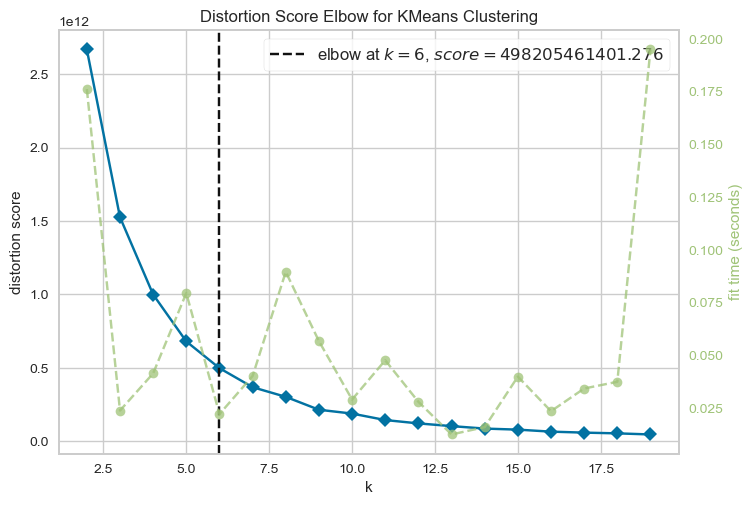

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
#Elbow Visualizer for Kmeans

from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.poof()

In [60]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
df_final["clusters"] = pred
df_final

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
0,0.936,0.887,-2.760,0.0683,0.02920,0.000002,0.0582,0.8890,127.003,227239,1
1,0.908,0.669,-2.827,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,290320,1
2,0.637,0.678,-3.798,0.2660,0.20900,0.000000,0.1560,0.2540,84.039,250760,1
3,0.548,0.847,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787,1
4,0.949,0.661,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,1
...,...,...,...,...,...,...,...,...,...,...,...
1339,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,1
1340,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,1
1341,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,1
1342,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,1


In [65]:
df_final['clusters'].value_counts()

clusters
1    1337
2       3
0       2
4       1
3       1
Name: count, dtype: int64

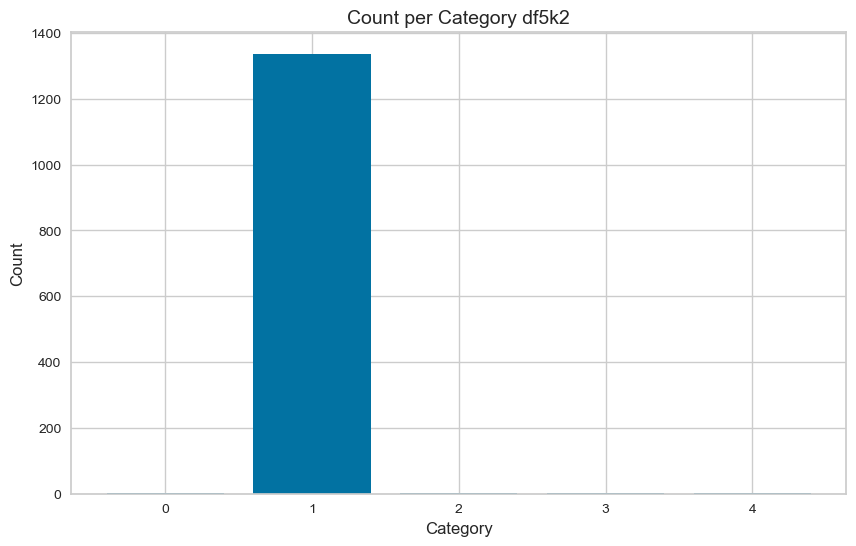

In [67]:
import matplotlib.pyplot as plt

counts = df_final['clusters'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)


plt.title('Count per Category df5k2', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()

In [69]:
df5k = pd.read_csv('final_playlist.csv', delimiter=',')
df5k

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,1VU8t2MpJRLG5iFEIxqq7z,230467,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,4YRvb9B8cgvhst11qk8CKn,360147,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,7qiZfU4dY1lWllzX7mPBI3,233713,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,0E9ZjEAyAwOXZ7wJC0PD33,184560,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,4OSBTYWVwsQhGLF9NHvIbR,228093,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,1Wl0fMRT0YzndDmHZCFvoT,131294,Roadtrip
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,6DGIg7YNSXWz1SAnJ1S8bX,278719,Paradise
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,6WzGciwEdqlkPuMf3bDmX7,157192,Roadtrip
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,2IJZWPp6TnMWHyGqjrz3Ci,375361,Roadtrip - Moritz Hofbauer Remix


In [71]:
df5k2 = df5k.drop(['id', 'names'], axis=1)
df5k2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093
...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361


In [73]:
# KNN
X3 = df5k2

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X3)
pred5 = kmeans.predict(X3)

print("Model Silhouette Score: {}".format(silhouette_score(X3, pred5, metric='euclidean')))

Model Silhouette Score: 0.5397288413475236


In [75]:
# Agglomerative

agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='ward')
pred5 = agglomerative.fit_predict(X3)

print("Model Silhouette Score: {}".format(silhouette_score(X3, pred5, metric='euclidean')))

Model Silhouette Score: 0.5019736858916806


In [77]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=5,linkage='single')
pred5 = agglomerative.fit_predict(X3)

print("Model Silhouette Score: {}".format(silhouette_score(X3, pred5, metric='euclidean')))

Model Silhouette Score: 0.8209512626430715


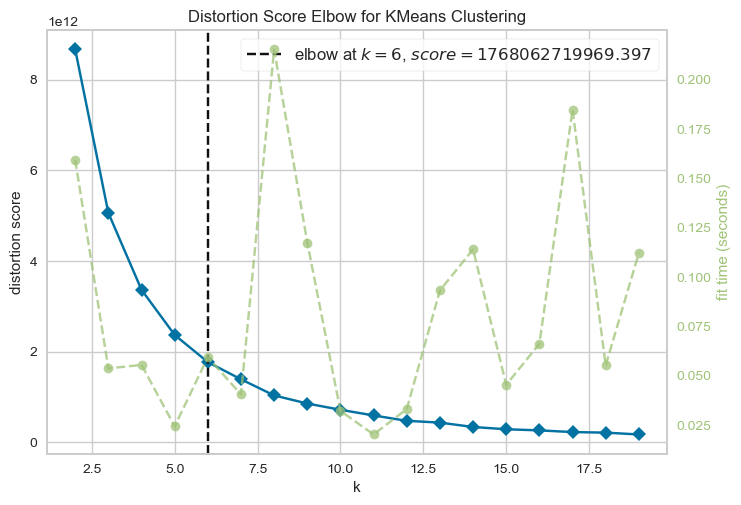

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X3)
visualizer.poof()

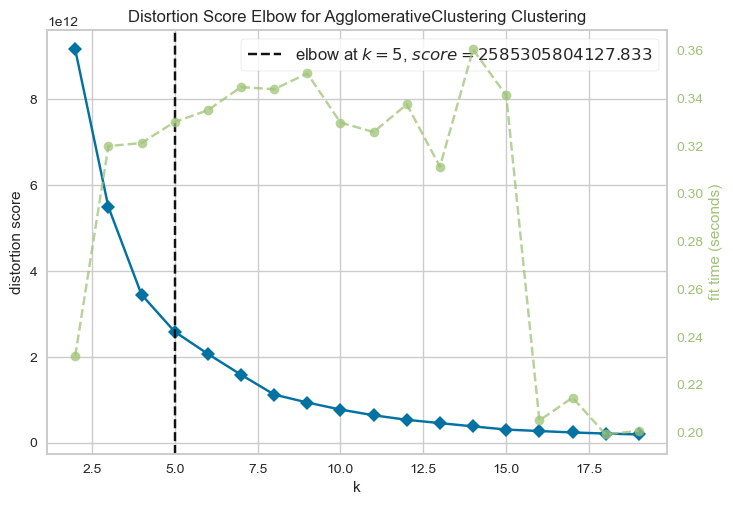

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X3)
visualizer.poof()

In [82]:
pred5

array([1, 1, 1, ..., 1, 1, 1])

In [83]:
df5k2["clusters"] = pred5
df5k2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,1
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,1
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,1
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,1
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,1
...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,1
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,1
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,1
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,1


In [84]:
df5k2 = df5k2.rename(columns={'clusters': 'cluster'})
df5k2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,1
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,1
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,1
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,1
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,1
...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,1
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,1
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,1
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,1


In [144]:
df5k2 = pd.concat([df5k2, names_id], axis = 1)
df5k2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,1,2HYFX63wP3otVIvopRS99Z,Houdini,2HYFX63wP3otVIvopRS99Z,Houdini
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,1,7lQ8MOhq6IN2w8EYcFNSUk,Without Me,7lQ8MOhq6IN2w8EYcFNSUk,Without Me
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,1,561jH07mF1jHuk7KlaeF0s,Mockingbird,561jH07mF1jHuk7KlaeF0s,Mockingbird
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,1,4xkOaSrkexMciUUogZKVTS,Till I Collapse,4xkOaSrkexMciUUogZKVTS,Till I Collapse
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,1,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,1,NaN,NaN,NaN,NaN
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,1,NaN,NaN,NaN,NaN
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,1,NaN,NaN,NaN,NaN
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,1,NaN,NaN,NaN,NaN


In [91]:
df5k2['cluster'].value_counts()

cluster
1    4629
0       3
3       1
4       1
2       1
Name: count, dtype: int64

In [146]:
output_file_path = '/Users/mehdisahraoui/Desktop/IronHackordner/Week10/Spotify_Project/Spotify Labs notbooks/df5k2_exported.csv'
df5k2.to_csv(output_file_path, index=False)  # index=False, um den Index nicht mit zu exportieren

print(f"DataFrame wurde erfolgreich als '{output_file_path}' exportiert.")

DataFrame wurde erfolgreich als '/Users/mehdisahraoui/Desktop/IronHackordner/Week10/Spotify_Project/Spotify Labs notbooks/df5k2_exported.csv' exportiert.


In [93]:
silhouette_score(X3, pred5, metric='euclidean')

0.8209512626439492

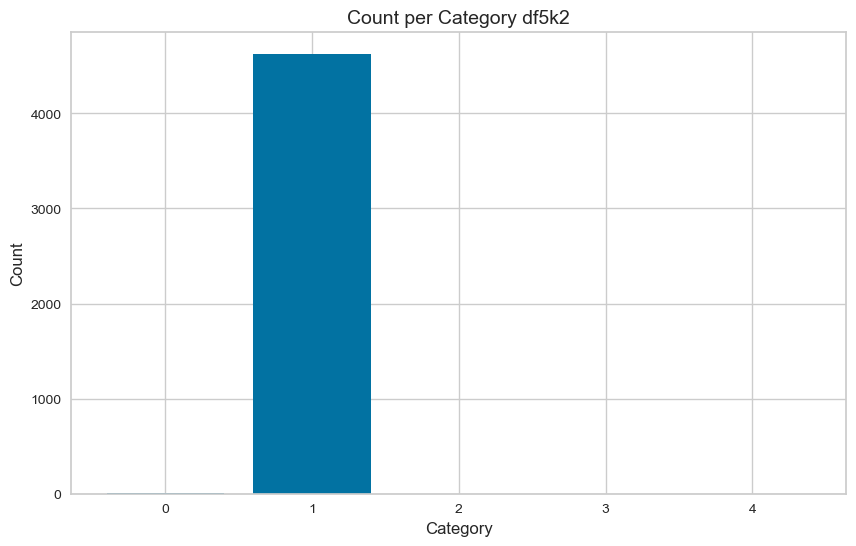

In [95]:
import matplotlib.pyplot as plt

counts = df5k2['cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)


plt.title('Count per Category df5k2', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()

In [117]:
df1k = pd.read_csv('/Users/mehdisahraoui/Desktop/IronHackordner/Week10/Spotify_Project/Spotify Labs notbooks/Group4_1000_V1 .csv')
df1k


,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names
0,0,0.936,0.887,-2.760,0.0683,0.02920,0.000002,0.0582,0.8890,127.003,227239,2,2HYFX63wP3otVIvopRS99Z,Houdini
1,1,0.908,0.669,-2.827,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,290320,1,7lQ8MOhq6IN2w8EYcFNSUk,Without Me
2,2,0.637,0.678,-3.798,0.2660,0.20900,0.000000,0.1560,0.2540,84.039,250760,2,561jH07mF1jHuk7KlaeF0s,Mockingbird
3,3,0.548,0.847,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787,1,4xkOaSrkexMciUUogZKVTS,Till I Collapse
4,4,0.949,0.661,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,1,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,1339,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,5,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
1340,1340,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,1,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
1341,1341,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,5,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
1342,1342,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,1,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


In [119]:
df1k = df1k.drop('Unnamed: 0', axis=1)
df1k

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names
0,0.936,0.887,-2.760,0.0683,0.02920,0.000002,0.0582,0.8890,127.003,227239,2,2HYFX63wP3otVIvopRS99Z,Houdini
1,0.908,0.669,-2.827,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,290320,1,7lQ8MOhq6IN2w8EYcFNSUk,Without Me
2,0.637,0.678,-3.798,0.2660,0.20900,0.000000,0.1560,0.2540,84.039,250760,2,561jH07mF1jHuk7KlaeF0s,Mockingbird
3,0.548,0.847,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787,1,4xkOaSrkexMciUUogZKVTS,Till I Collapse
4,0.949,0.661,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,1,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,5,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
1340,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,1,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
1341,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,5,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
1342,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,1,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


In [121]:
df1k['cluster'].value_counts()

cluster
0    398
2    374
5    308
1    173
4     73
3     18
Name: count, dtype: int64

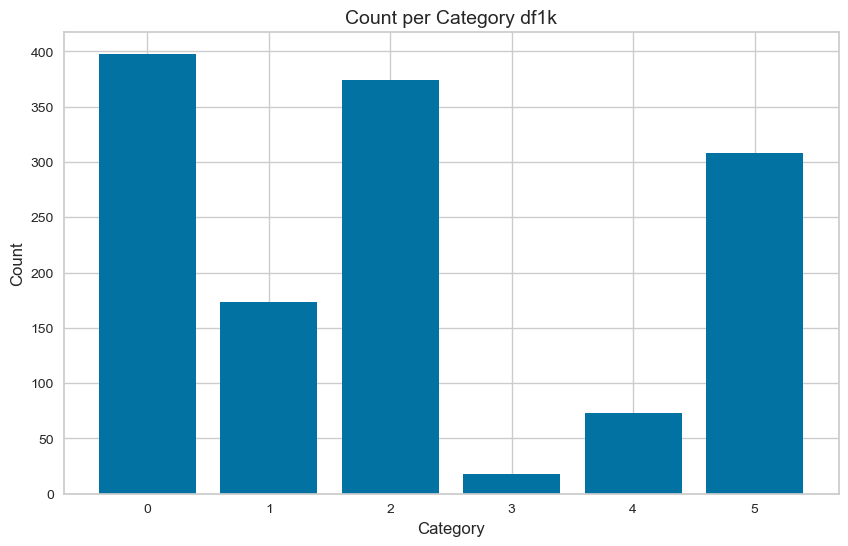

In [123]:
counts = df1k['cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)


plt.title('Count per Category df1k', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()

In [125]:
df1k

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names
0,0.936,0.887,-2.760,0.0683,0.02920,0.000002,0.0582,0.8890,127.003,227239,2,2HYFX63wP3otVIvopRS99Z,Houdini
1,0.908,0.669,-2.827,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,290320,1,7lQ8MOhq6IN2w8EYcFNSUk,Without Me
2,0.637,0.678,-3.798,0.2660,0.20900,0.000000,0.1560,0.2540,84.039,250760,2,561jH07mF1jHuk7KlaeF0s,Mockingbird
3,0.548,0.847,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787,1,4xkOaSrkexMciUUogZKVTS,Till I Collapse
4,0.949,0.661,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,1,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,5,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
1340,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,1,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
1341,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,5,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
1342,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,1,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


In [127]:
df5k2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,1,2HYFX63wP3otVIvopRS99Z,Houdini
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,1,7lQ8MOhq6IN2w8EYcFNSUk,Without Me
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,1,561jH07mF1jHuk7KlaeF0s,Mockingbird
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,1,4xkOaSrkexMciUUogZKVTS,Till I Collapse
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,1,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,1,NaN,NaN
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,1,NaN,NaN
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,1,NaN,NaN
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,1,NaN,NaN


# Exported csv file as df1k and df5k2

### Export Model

In [131]:
import pickle

In [133]:
with open('spotify_kmeans_model.pkl', 'wb') as file:  # Named appropriately for clarity
    pickle.dump(kmeans, file)